<a href="https://colab.research.google.com/github/frank2720/Ritz-Carlton-Hotel-Wine-selection/blob/main/GundlaAmruth_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case

You work in analytics for the Ritz Carlton Hotel Company, a multinational corporation operating luxury chain hotels. The hotel chain is known for offering luxury services, including food and beverage. You have been tasked with automating the process of wine selection for the hotels by the Head Corporate Sommelier. You will use the **[whitewine-classification.csv](https://github.com/CHill-MSU/INFO583/blob/main/whitewine-classification.csv)** data in your analysis, which includes characteristics of the wines.


<hr>

## Prerequisite Code

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Questions

>  0. **(a) First, use the 'whitewine-classification.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [ ]:
from google.colab import files
upload = files.upload()
data = pd.read_csv('whitewine-classification.csv')
print(data.head())

Saving whitewine-classification.csv to whitewine-classification (2).csv
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  go

>  0. **(b) View the dataframe information to evaluate variable types and missingness.**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  goodwine              4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


>  0. **(c) (0) Use a heatmap to evaluate if there are missing values in the `data` dataframe.**

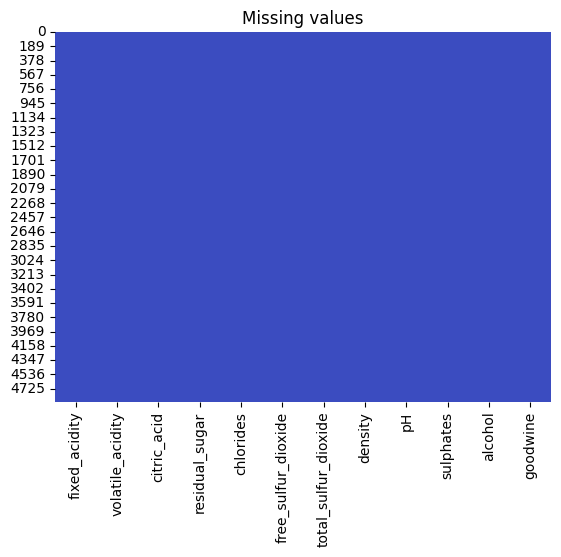

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing values")
plt.show()



---



>  1. **(a) (5) In your classification analysis you will use all other variables as predictors to predict `goodwine`, which takes on values of `1` if the wine is top quality and `0`, otherwise. Visualize the distribution of the target variable.**

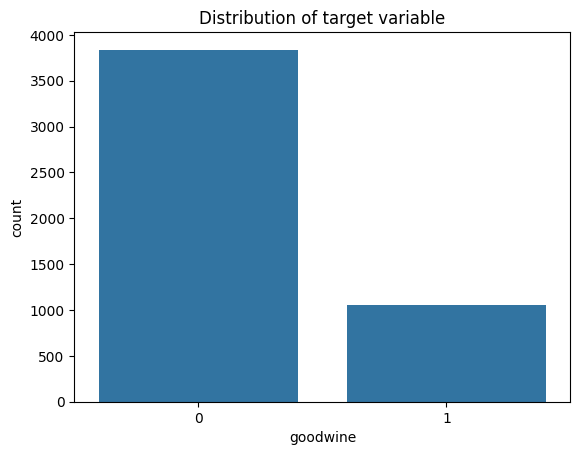

In [ ]:
sns.countplot(x='goodwine',data=data)
plt.title("Distribution of target variable")
plt.show()

>  1. **(b) (5) Based on your output in Question 1a, do you think class imbalance is present? Why or why not? Explain.**

Yes, because number of goodwine value 0 is much higher than than goodwine value 1.



---



>  2. **(a) (5) Next, you will identify your predictor and target variables. Create `X`, which contains all predictor variables. Create `y`, which contains the target variable.**

In [ ]:
X = data.drop("goodwine", axis=1)
y = data["goodwine"]

>  2. **(b) (5) Create the train and test sets from the `X` and `y` objects using a 75/25 train/test split and a random state of 123.**

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, train_size=0.75, random_state=123)



---



>  3. **(a) (10) Fit the Logistic Regression model using sklearn. If you identified class imbalance in Question 1b, include the argument `class_weight = 'balanced'`. Use the liblinear solver and initialize a random state of 123. Then, obtain predctions.**

In [ ]:
LR_model = LogisticRegression(class_weight='balanced',solver='liblinear', random_state=123)

LR_model.fit(X_train, y_train)

y_pre_LR_model = LR_model.predict(X_test)

>  3. **(b) (15) Next, you will fit 2 Naive Bayes models using sklearn. Then, obtain predictions for both models. Below is a description of the models:**
 * Model 1: Multinomial Bayes.
 * Model 2: If you identified class imbalance in Question 1b, use Complement Naive Bayes (`ComplementNB()`). Otherwise, use Gaussian Naive Bayes (`GaussianNB()`).

For more information, view the documentation:

* [ComplementNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.ComplementNB.html)

* [GaussianNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [ ]:
#Model
model1 = MultinomialNB()
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)

#Model2
model2 = ComplementNB()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)

>  3. **(c) (15) In the class example [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) was used. In viewing the documentation for [ComplementNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.ComplementNB.html) and [GaussianNB](https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html), why might these models be a better fit to the data? Explain.**

GaussianNB is a better fit since the data is continous and ComplementNB is better for handling class imbalance compared to MultinomialNB.



---

<br>

> 4. **(a) (15) Next, output the classification report for each of the 3 classification models you trained. Be sure that the output is labeled by model.**

In [ ]:
print("Logistic regression classification report:")
print(classification_report(y_test, y_LR_model))

print("")
print("MultinomialNB model classification report:")
print(classification_report(y_test, y_pred_model1))

print("")
print("ComplementNB model classification report:")
print(classification_report(y_test, y_pred_model2))

Logistic regression classification report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       978
           1       0.37      0.77      0.50       247

    accuracy                           0.69      1225
   macro avg       0.65      0.72      0.64      1225
weighted avg       0.81      0.69      0.72      1225


MultinomialNB model classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       978
           1       0.37      0.36      0.37       247

    accuracy                           0.75      1225
   macro avg       0.61      0.60      0.60      1225
weighted avg       0.75      0.75      0.75      1225


ComplementNB model classification report:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72       978
           1       0.31      0.71      0.43       247

    accuracy                           0.62      122

> 4. **(b) (10) The Sommelier is most interested in being able to correctly predict high quality wines. Based on this, which of the 3 classification models would you recommend? Explain.**

Logistic regression model because it identifies most good wines as indeticated by highest recall.

> 4. **(c) (10) Quality is very important for the company. It would be highly embarrassing to distribute a wine to hotel guests that was predicted to be high quality, but was actually low quality. With this in mind, would your recommended model change? Why or why not? Explain.**

Yes, because precision matters more than recall when it comes to false positive and MultinomialNB is good since it gives higher accuracy with same precision to Logistic regression model.

> 4. **(d) (10) Finally, based on your output in Question 4a and considering the information provided in Question 4b and your response, is this a good model for the Ritz Carlton Hotel Company to use to predict if a wine is high quality? Why or why not? Explain.**

No, this is not a good model to rely on because all the three models have low precision for high-quality wines implying anything predicted as top quality are actually low quality.

<hr>